<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/M10_%EB%B6%84%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분해 (Decomposition)

- 큰 하나의 행렬을 여러개의 작은 행렬로 분해
- 분해 과정에서 중요한 정보만 남게됨



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [3]:
def plot_iris(iris, labels):
    plt.figure()
    colors = ['navy', 'purple', 'red']
    for xy, label in zip(iris, labels):
        plt.scatter(xy[0], xy[1], color=colors[label])

def show_faces(faces):
    plt.figure()
    num_rows, num_cols = 2, 3
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(np.reshape(faces[i], (64, 64)), cmap=plt.cm.gray)

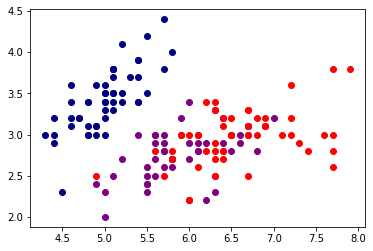

In [4]:
plot_iris(iris[:, :2], labels) # 150 * 4 中 2개만 가져옴

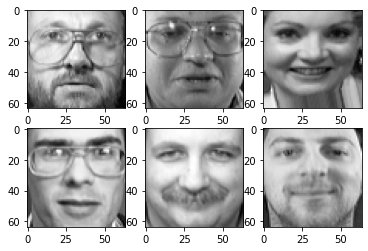

In [5]:
show_faces(faces)

# Principal Component Analysis (PCA)


- PCA를 사용해 iris 데이터 변환
- 150 * 4 크기의 데이터를 150 * 2 크기의 행렬로 압축

In [6]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

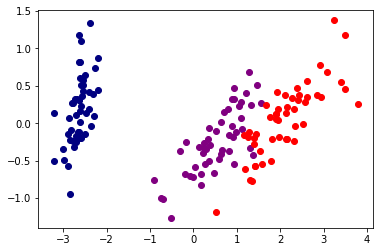

In [7]:
plot_iris(transformed_iris, labels) # 150*2로 분해했기 떄문에 그대로 출력

- PCA를 통해 학습된 각 컴포넌트 (6개)
- 각 컴포넌트는 얼구르이 주요 특징을 나타냄

In [8]:
model = PCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_
faces_components.shape # 400차원을 6차원으로 줄임

(6, 4096)

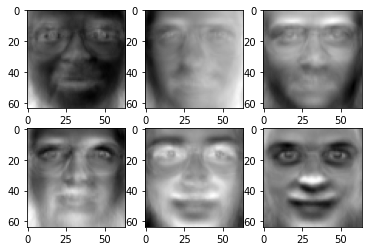

In [9]:
show_faces(faces_components)

# Incremental PCA

- PCA는 SVD알고리즘 실행을 위해 전체 학습용 데이터셋을 메모리에 올려야함
- Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
- 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 떄 유용

(150, 2)


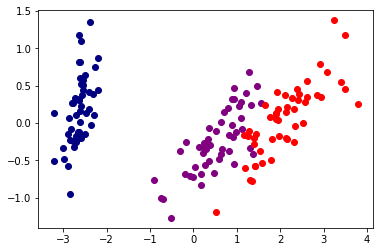

In [10]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


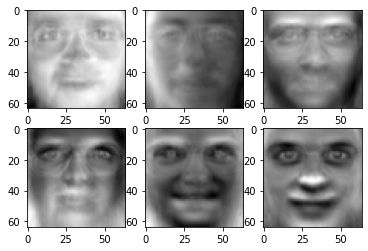

In [11]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Kernel PCA
- 차원 축소를 위한 복잡한 비선형 투영

(150, 2)


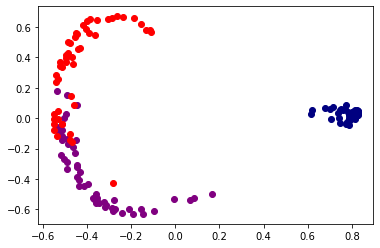

In [12]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

In [13]:
model = KernelPCA(n_components=2*3, kernel='rbf', random_state=0)
model.fit(faces)
faces_components = model.components_ # 커널 PCA에는 component가 없기 떄문에 에러 발생

print(faces_components.shape)

show_faces(faces_components)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


AttributeError: ignored

# Sparse PCA

- PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입역 변수들의 선형 결합르호 나타난다는 점
- 희소 주성분 분석은 몇 개 변수들만의 선형 결합으로 주성분을 나타냄으로써 이러한 단점을 극복

(150, 2)


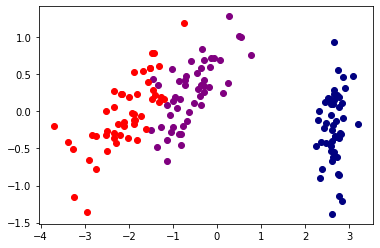

In [14]:
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


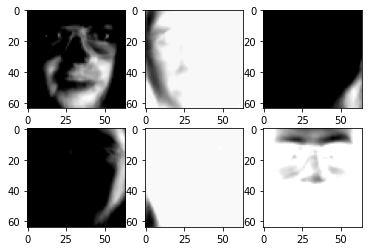

In [15]:
model = SparsePCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Truncated Singular Value Decomposition (Truncated SVD)

- PCA는 정방행렬에 대해서만 행렬 분해 가능
- SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
- PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소행렬(Spares Matrix)에 대한 변환도 가능
- 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
- 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

(150, 2)


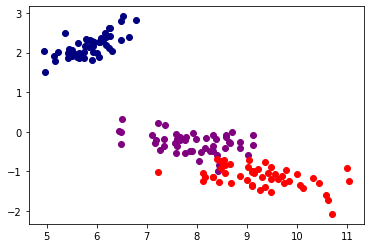

In [16]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


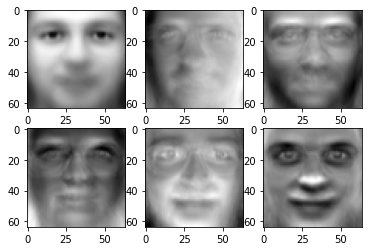

In [17]:
model = TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Dictionary Learning

- Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
- Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
- 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

(150, 2)


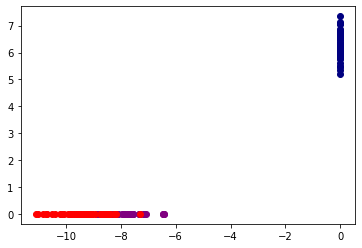

In [18]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


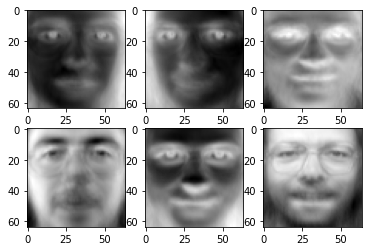

In [19]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Factor Analysis

- 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
- 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들끼리 묶어주는 방법
- PCA에서는 오차를 고려하지 않고, 요인 분석에서는 오차를 고려

(150, 2)


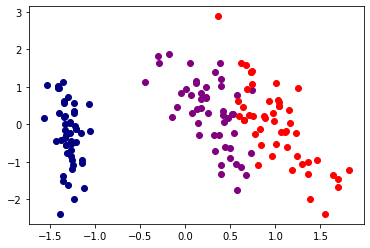

In [20]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


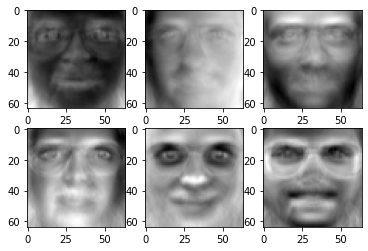

In [21]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Independent Component Analysis(ICA)

- 독립 성분 분석 (Independent Component Analysis)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
- ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 돍립적인 축, 독립성이 최대가 되는 벡터를 찾음

(150, 2)


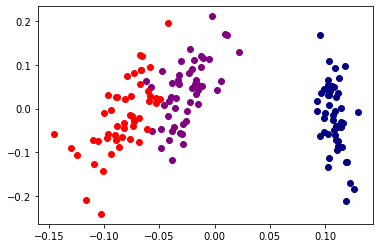

In [22]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


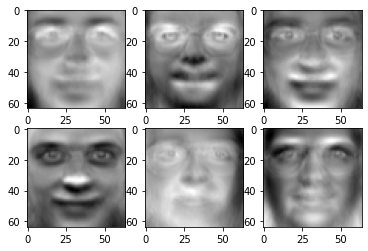

In [23]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Non-negative Matrix Factorization

- 음수 미포함 행렬 분해는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

(150, 2)


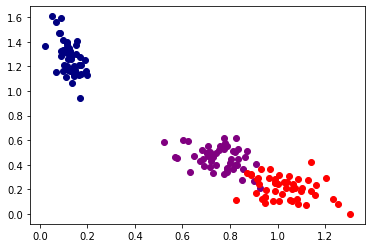

In [24]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


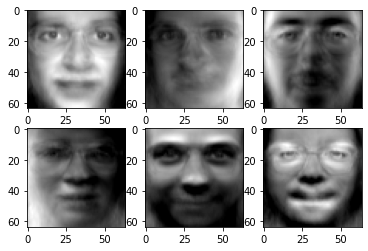

In [25]:
model = NMF(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Latent Dirichlet Allocation (LDA)

- 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
- 디리클레 분포에 따라 잠재적인 의미 구조를 파악

(150, 2)


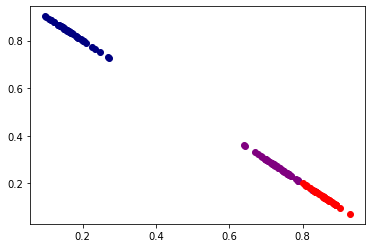

In [26]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

(6, 4096)


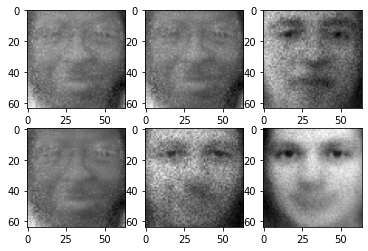

In [27]:
model = LatentDirichletAllocation(n_components=2*3, random_state=0)
model.fit(faces)
faces_components = model.components_

print(faces_components.shape)

show_faces(faces_components)

# Linear Discriminant Analysis (LDA)

- LDA는  PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
- LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수있는 기준을 최대한 유지하면서 차원 축소

(150, 2)


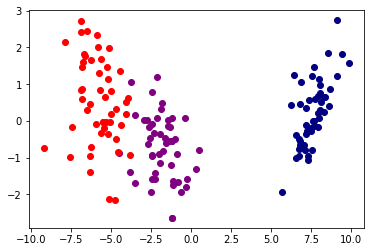

In [28]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)

print(transformed_iris.shape)

plot_iris(transformed_iris, labels)

# 압축된 표현을 사용한 학습

- 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_digits

In [30]:
def min_max_scale(x):
    min_val, max_val = np.min(x, 0), np.max(x, 0)
    x = (x - min_val) / (max_val - min_val)
    return x

def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection = projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]),
                    color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size' : 9})
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], str(labels[i]),
                    color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size' : 9})

(1797, 64)
(1797, 3)


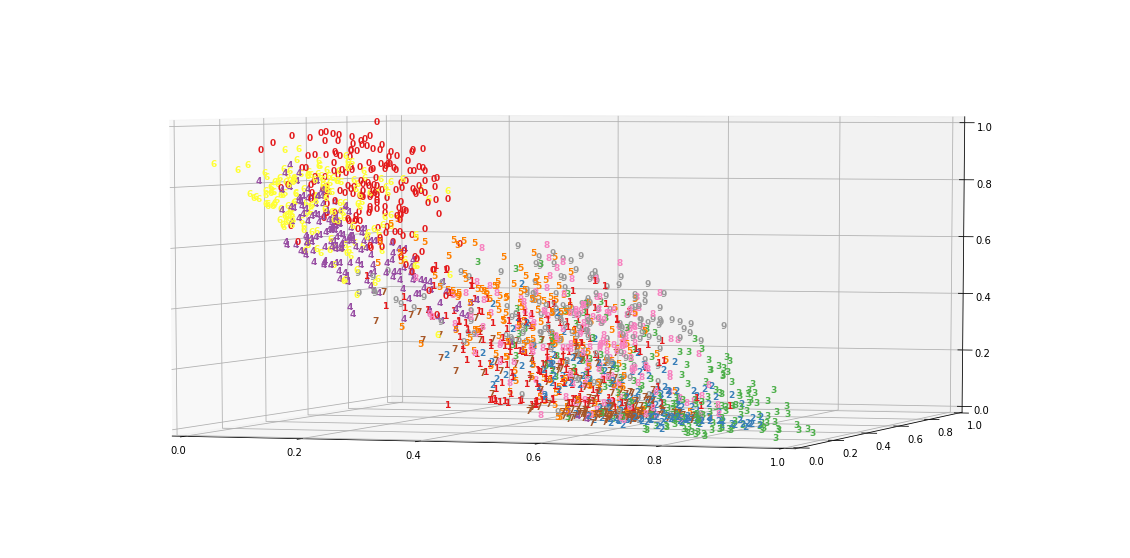

In [31]:
digits = load_digits()

nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

print(digits.data.shape)
print(decomposed_digits.shape)

plt.figure(figsize=(20, 10))
plot_digits(decomposed_digits, digits.target, 111, '3d')

KNN

In [32]:
knn = KNeighborsClassifier()

score = cross_val_score(
    estimator=knn,
    X=digits.data, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
mean corss val score : 0.9627282575054161 (+/-) 0.011168537355954218


In [33]:
knn = KNeighborsClassifier()

score = cross_val_score(
    estimator=knn,
    X=decomposed_digits, y=digits.target,
    cv=5
)

print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.54722222 0.58055556 0.64066852 0.59610028 0.56267409]
mean corss val score : 0.5854441349427422 (+/-) 0.03214521445075084


SVM

In [34]:
svc = SVC()

score = cross_val_score(
    estimator=svc,
    X=digits.data, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
mean corss val score : 0.9632838130609718 (+/-) 0.02008605863225686


In [35]:
svc = SVC()

score = cross_val_score(
    estimator=svc,
    X=decomposed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.61388889 0.62222222 0.66016713 0.60167131 0.59888579]
mean corss val score : 0.6193670690188796 (+/-) 0.022070024720937543


Decision Tree

In [36]:
decision_tree = DecisionTreeClassifier()

score = cross_val_score(
    estimator=decision_tree,
    X=digits.data, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.77777778 0.73611111 0.80779944 0.82172702 0.78830084]
mean corss val score : 0.7863432373878056 (+/-) 0.02936953043852645


In [37]:
decision_tree = DecisionTreeClassifier()

score = cross_val_score(
    estimator=decision_tree,
    X=decomposed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.59444444 0.50833333 0.58495822 0.57381616 0.50139276]
mean corss val score : 0.5525889817393996 (+/-) 0.03957235365638672


random forest

In [38]:
model = RandomForestClassifier()

score = cross_val_score(
    estimator=model,
    X=digits.data, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.93888889 0.91944444 0.95821727 0.96657382 0.93036212]
mean corss val score : 0.9426973073351903 (+/-) 0.017425920492924296


In [39]:
model = RandomForestClassifier()

score = cross_val_score(
    estimator=model,
    X=decomposed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.55833333 0.58055556 0.65181058 0.59610028 0.55153203]
mean corss val score : 0.5876663571649644 (+/-) 0.035783493758552776


# 복원된 표현을 사용한 학습

- 분해 후 복원된 행렬을 사용해  학습

In [40]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components # @는 행렬곱
reconstructed_digits.shape

(1797, 64)

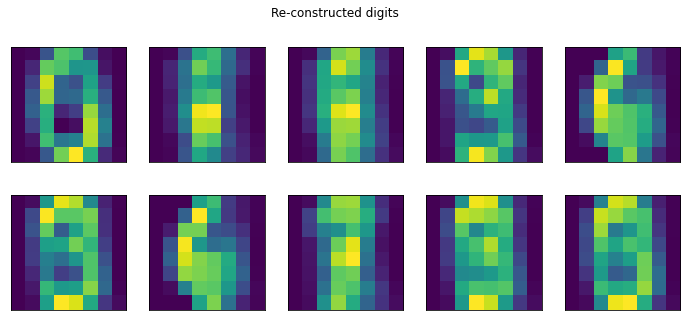

In [41]:
plt.figure(figsize=(12, 5))
plt.suptitle('Re-constructed digits')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8, 8))

KNN

In [42]:
model = KNeighborsClassifier()

score = cross_val_score(
    estimator=model,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.54166667 0.59444444 0.66295265 0.57660167 0.57381616]
mean corss val score : 0.5898963169297431 (+/-) 0.04029722337499952


SVC

In [43]:
model = SVC()

score = cross_val_score(
    estimator=model,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.62777778 0.60555556 0.66016713 0.61002786 0.5821727 ]
mean corss val score : 0.6171402042711235 (+/-) 0.025969174809053776


In [44]:
model = DecisionTreeClassifier()

score = cross_val_score(
    estimator=model,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.57222222 0.53333333 0.53760446 0.56824513 0.53760446]
mean corss val score : 0.549801918910554 (+/-) 0.016802335182250796


In [45]:
model = RandomForestClassifier()

score = cross_val_score(
    estimator=model,
    X=reconstructed_digits, y=digits.target,
    cv=5
)
print(score)
print('mean corss val score : {} (+/-) {}'.format(score.mean(), score.std()))

[0.58055556 0.57777778 0.64345404 0.59888579 0.5821727 ]
mean corss val score : 0.5965691736304549 (+/-) 0.02457790979148959


# 이미지 복원

In [46]:
from sklearn.model_selection import train_test_split

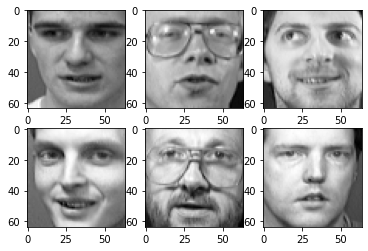

In [47]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

show_faces(train_faces)

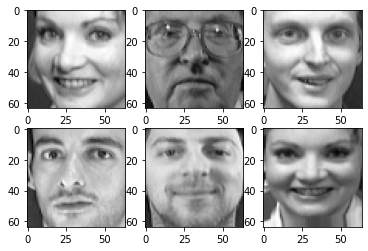

In [48]:
show_faces(test_faces)

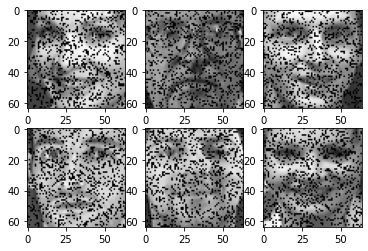

In [49]:
damaged_faces = []
for face in test_faces:
    idx = np.random.choice(range(64 * 64), size=1024)
    damaged_face = face.copy()
    damaged_face[idx] = 0.
    damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [50]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

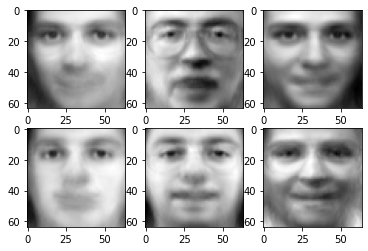

In [51]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

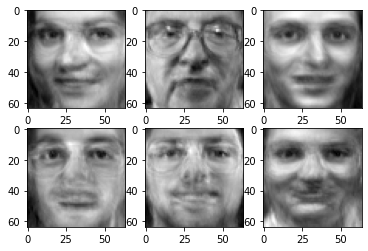

In [52]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

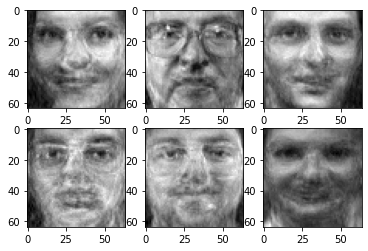

In [53]:
nmf = NMF(n_components=500)
nmf.fit(train_faces)

matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)